In [1]:
import numpy as np 
import pandas as pd 
import os 
import subprocess
import matplotlib.pyplot as plt
import matplotlib
import ast
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['text.usetex'] = True
from scipy.interpolate import griddata

# Define filtering and plotting functions


In [2]:
def filter_data(tanb_value):
    filtered_df = dataframe[(dataframe['tanb'] == tanb_value) & (dataframe['mhiggs'].apply(lambda x: isinstance(x, list) and 
                                                                  len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)))].reset_index(drop=True)
    return filtered_df

# Plot for $M=1000GeV$

In [3]:
# Function to parse strings representing lists -- since my dataframe contains both floats and lists of floats 

def parse_list(column_entry):
    try:
        return ast.literal_eval(column_entry) if isinstance(column_entry, str) else column_entry
    except (ValueError, SyntaxError):
        return None  
        
# Read the file and parse the 'mhiggs' and 'errors' columns
df1K = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_1000.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    },
    index_col = 0
)

print(df1K.dtypes)


tanb      float64
mueff     float64
mA        float64
lam       float64
kappa     float64
At/M      float64
Ak        float64
mhiggs     object
errors     object
dtype: object


In [8]:
np.unique(df1K['mhiggs'])

array([list([None, None, None])], dtype=object)

In [9]:
df1K.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,mhiggs,errors
0,5.0,2000.0,1000.0,0.01,0.001,2.0,-1000.0,"[None, None, None]",[]
1,5.0,2000.0,1000.0,0.01,0.001,2.0,-747.5,"[None, None, None]",[]


### $\tan \beta =5$

In [4]:
tb5_1K = df1K[
    (df1K['tanb'] == 5) &
    (df1K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb5_1K = tb5_1K.copy()
tb5_1K['Xt/M'] = tb5_1K['At/M'] - 2/5
tb5_1K.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M


In [39]:
max(tb5_1K['errors'])

[300000.0, 300000.0, 300000.0]

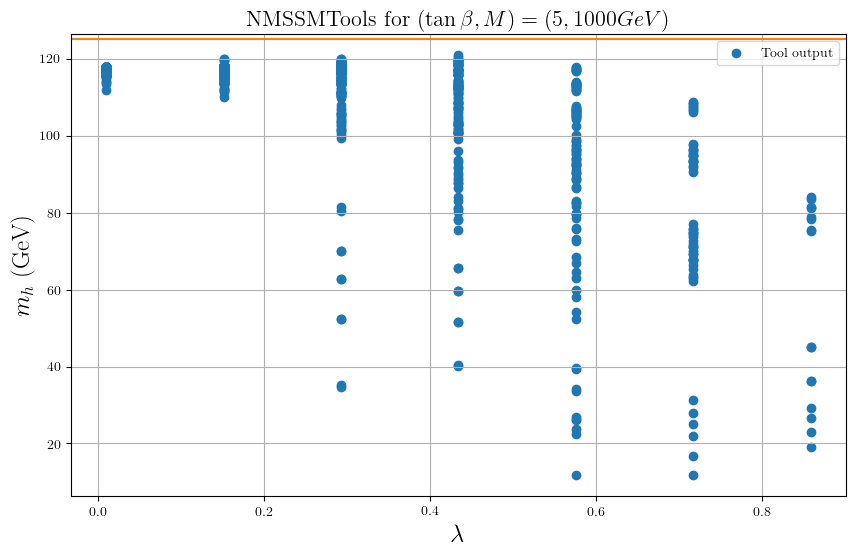

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(tb5_1K['lam'],tb5_1K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], tb5_1K['mhiggs'].apply(lambda x: x[0]).values, yerr=tb5_1K['errors'].apply(lambda x: x[0]).values, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (5,1000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim(110,140)
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

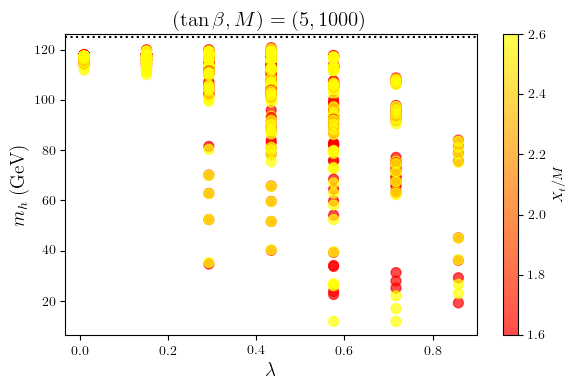

In [100]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb5_1K['lam'],  tb5_1K['mhiggs'].apply(lambda x: x[0]).values, c=tb5_1K['Xt/M'], cmap='autumn',s=50,   alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (5, 1000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta = 20 $

In [7]:
tb20_1K = df1K[
    (df1K['tanb'] == 20) &
    (df1K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb20_1K = tb20_1K.copy()
tb20_1K['Xt/M'] = tb20_1K['At/M'] - 2/20
tb20_1K.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M


In [9]:
np.unique(df1K['mhiggs'])

array([list([None, None, None])], dtype=object)

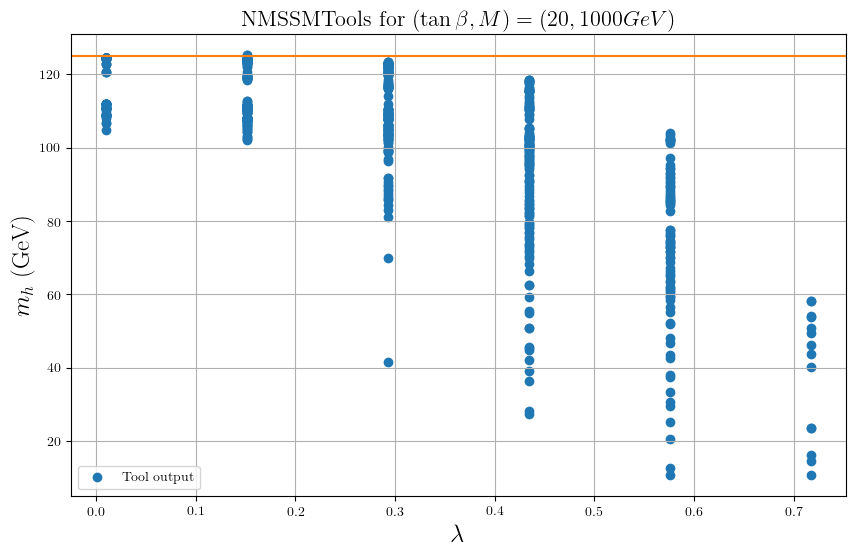

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(tb20_1K['lam'],tb20_1K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (20,1000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

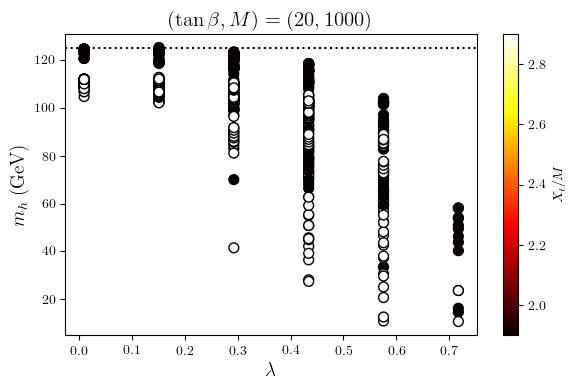

In [49]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb20_1K['lam'],  tb20_1K['mhiggs'].apply(lambda x: x[0]).values, c=tb20_1K['Xt/M'], cmap='hot',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (20, 1000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta = 50 $

In [10]:
tb50_1K = df1K[
    (df1K['tanb'] == 50) &
    (df1K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb50_1K = tb50_1K.copy()
tb50_1K['Xt/M'] = tb50_1K['At/M'] - 2/50
tb50_1K.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M


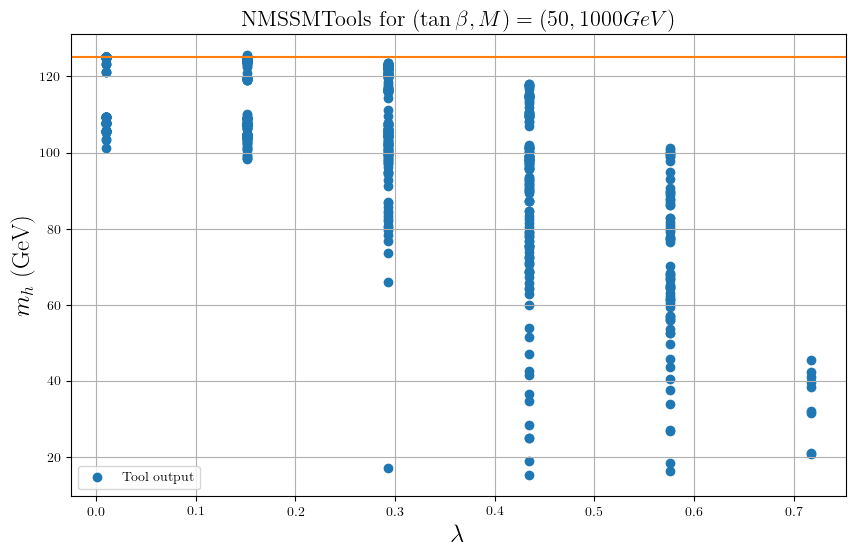

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(tb50_1K['lam'],tb50_1K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (50,1000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

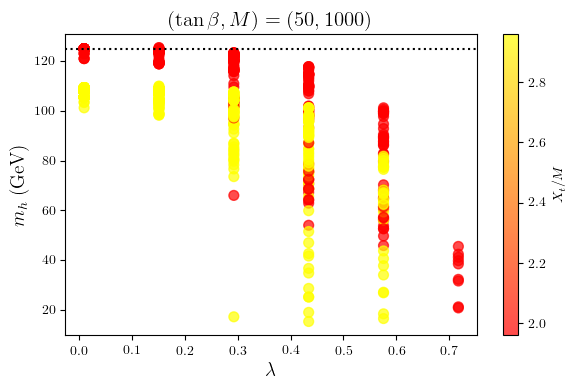

In [99]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb50_1K['lam'],  tb50_1K['mhiggs'].apply(lambda x: x[0]).values, c=tb50_1K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (50, 1000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =20$, $M =1000$ and $\mu =3M$

In [36]:
df1K3M = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_1000_3M.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    }
)

print(df1K3M.dtypes)


tanb        int64
mueff       int64
mA          int64
lam       float64
kappa     float64
At/M        int64
Ak        float64
M1          int64
M2          int64
M3          int64
mhiggs     object
errors     object
dtype: object


In [37]:
df1K3M.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors
0,20,3000,0,0.01,0.001,2,-1000.0,1000,1500,2000,"[114.878509, 248.678177, 712.615111]","[3220985.16, 300000.0, 300000.0]"
1,20,3000,0,0.01,0.001,2,-747.5,1000,1500,2000,"[120.520079, 369.134331, 712.570318]","[3221141.0, 300000.0, 300000.0]"


In [38]:
import ast

# Will use ast to convert the strings back to lists for the 'mhiggs' and 'errors' entries. 
df1K3M['mhiggs'] = df1K3M['mhiggs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df1K3M['mhiggs_1'] = df1K3M['mhiggs'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df1K3M.head(2)


,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1
0,20,3000,0,0.01,0.001,2,-1000.0,1000,1500,2000,"[114.878509, 248.678177, 712.615111]","[3220985.16, 300000.0, 300000.0]",114.878509
1,20,3000,0,0.01,0.001,2,-747.5,1000,1500,2000,"[120.520079, 369.134331, 712.570318]","[3221141.0, 300000.0, 300000.0]",120.520079


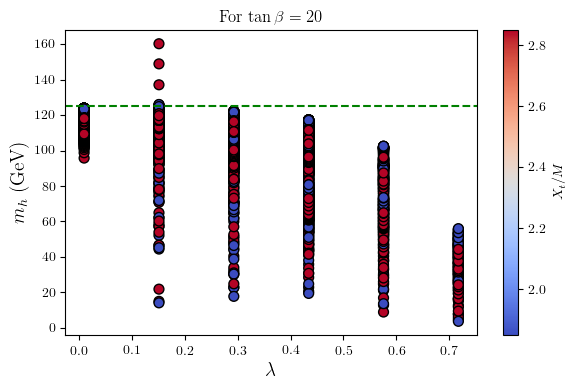

In [40]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(df1K3M[df1K3M['tanb'] == 20]['lam'], df1K3M[df1K3M['tanb'] == 20]['mhiggs_1'], c=df1K3M[df1K3M['tanb'] == 20]['At/M'] - 3/20, cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'For $\tan \beta = 20$')
# plt.ylim(-60e+3,60e+3)
# plt.xlim(0,1000)
plt.axhline(y=125 , color='green', linestyle='--')
plt.tight_layout()
plt.show()

### $\tan \beta =20$, $M =1000$ and $\mu =0.7M$

In [12]:
df1K0p7M = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_1000_0p7M.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    }
)

print(df1K0p7M.dtypes)


tanb        int64
mueff     float64
mA          int64
lam       float64
kappa     float64
At/M        int64
Ak        float64
M1          int64
M2          int64
M3          int64
mhiggs     object
errors     object
dtype: object


In [13]:
import ast

# Will use ast to convert the strings back to lists for the 'mhiggs' and 'errors' entries. 
df1K0p7M['mhiggs'] = df1K0p7M['mhiggs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df1K0p7M['mhiggs_1'] = df1K0p7M['mhiggs'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df1K0p7M['mhiggs_2'] = df1K0p7M['mhiggs'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 0 else None)
df1K0p7M['mhiggs_3'] = df1K0p7M['mhiggs'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 0 else None)


df1K0p7M.head(2)


,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3
0,20,700.0,0,0.01,0.001,2,-1000.0,1000,1500,2000,"[None, None, None]",[],NaN,NaN,NaN
1,20,700.0,0,0.01,0.001,2,-747.5,1000,1500,2000,"[None, None, None]",[],NaN,NaN,NaN


In [14]:
df1K0p7M_ordered = df1K0p7M[(df1K0p7M['mhiggs_1'] <= 200) & (df1K0p7M['mhiggs_1'] >= 100) & (df1K0p7M['mhiggs_1'] < df1K0p7M['mhiggs_2']) & (df1K0p7M['mhiggs_1'] < df1K0p7M['mhiggs_3'])]
df1K0p7M_ordered.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3
5,20,700.0,0,0.01,0.108,2,-1000.0,1000,1500,2000,"[123.864497, 147.148953, 14871.7614]","[856231.7, 300000.0, 300000.0]",123.864497,147.148953,14871.7614
6,20,700.0,0,0.01,0.108,2,-747.5,1000,1500,2000,"[124.195303, 152.991443, 14935.8661]","[855108.95, 300000.0, 300000.0]",124.195303,152.991443,14935.8661


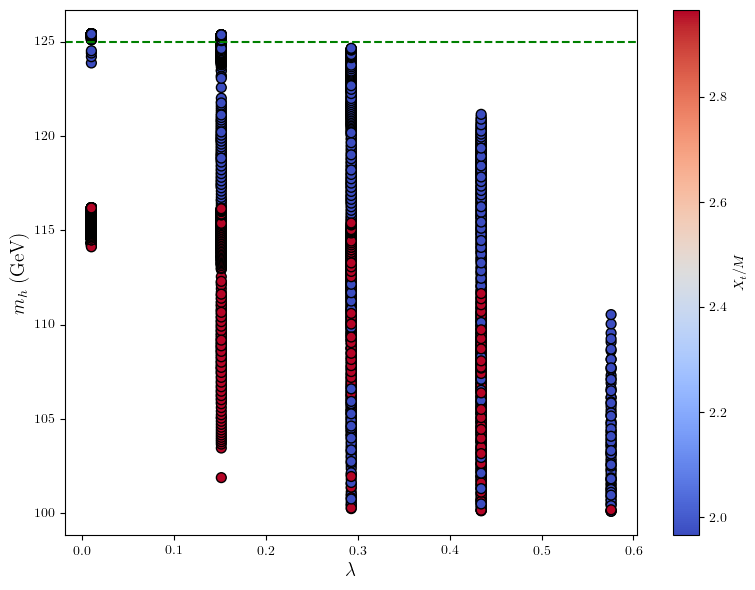

In [15]:
# heat map without interpolation

# ## All data --- No order requirement
# plt.figure(figsize=(6, 4))
# scatter = plt.scatter(df1K0p7M[df1K0p7M['tanb']==20]['lam'], df1K0p7M[df1K0p7M['tanb']==20]['mhiggs_1'], c=df1K0p7M[df1K0p7M['tanb']==20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
# plt.colorbar(scatter, label=r'$X_t/M$')

# plt.xlabel(r'$\lambda$', fontsize=14)
# plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
# plt.title(r'For $\tan \beta =20$')
# #plt.yscale('log')
# # plt.ylim(-60e+3,60e+3)
# # plt.xlim(0,1000)
# plt.axhline(y=125 , color='green', linestyle='--')
# plt.tight_layout()
# plt.show()

## Higgs spectrum order constraint 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df1K0p7M_ordered[df1K0p7M_ordered['tanb'] == 20]['lam'], df1K0p7M_ordered[df1K0p7M_ordered['tanb'] ==20]['mhiggs_1'], c=df1K0p7M_ordered[df1K0p7M_ordered['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
#plt.ylim(95,175)
# plt.xlim(0,1000)
plt.axhline(y=125 , color='green', linestyle='--')
plt.tight_layout()
plt.show()

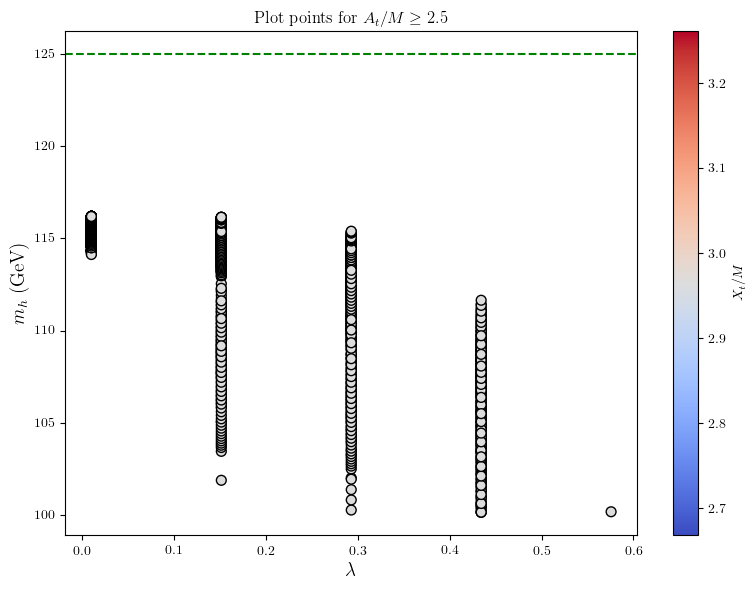

In [16]:
## Higgs spectrum order constraint 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df1K0p7M_ordered[(df1K0p7M_ordered['tanb'] == 20) & (df1K0p7M_ordered['At/M'] >=2.5)]['lam'], 
                      df1K0p7M_ordered[(df1K0p7M_ordered['tanb'] == 20) & (df1K0p7M_ordered['At/M'] >=2.5)]['mhiggs_1'], 
                      c=df1K0p7M_ordered[(df1K0p7M_ordered['tanb'] == 20) & (df1K0p7M_ordered['At/M'] >=2.5)]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'Plot points for $A_t/M \geq 2.5$ ')
#plt.ylim(95,175)
# plt.xlim(0,1000)
plt.axhline(y=125 , color='green', linestyle='--')
plt.tight_layout()
plt.show()

# Plot for $M=2000GeV$

In [4]:
# Read the file and parse the 'mhiggs' and 'errors' columns
df2K = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_2000.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    },
    index_col = 0
)

print(df2K.dtypes)


tanb      float64
mueff     float64
mA        float64
lam       float64
kappa     float64
At/M      float64
Ak        float64
mhiggs     object
errors     object
dtype: object


In [9]:
np.unique(df2K['mhiggs'])

array([list([None, None, None])], dtype=object)

### $\tan \beta = 5$

In [56]:
tb5_2K = df2K[
    (df2K['tanb'] == 5) &
    (df2K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb5_2K = tb5_2K.copy()
tb5_2K['Xt/M'] = tb5_2K['At/M'] - 2/5
tb5_2K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,5.0,1000.0,0.01,0.001,2.0,-1000.0,"[117.470062, 490.249162, 1183.62368]","[928198.73, 300000.0, 300000.0]",1.6
1,5.0,1000.0,0.01,0.001,2.0,-747.5,"[118.465445, 584.044732, 1183.6157]","[928249.78, 300000.0, 300000.0]",1.6


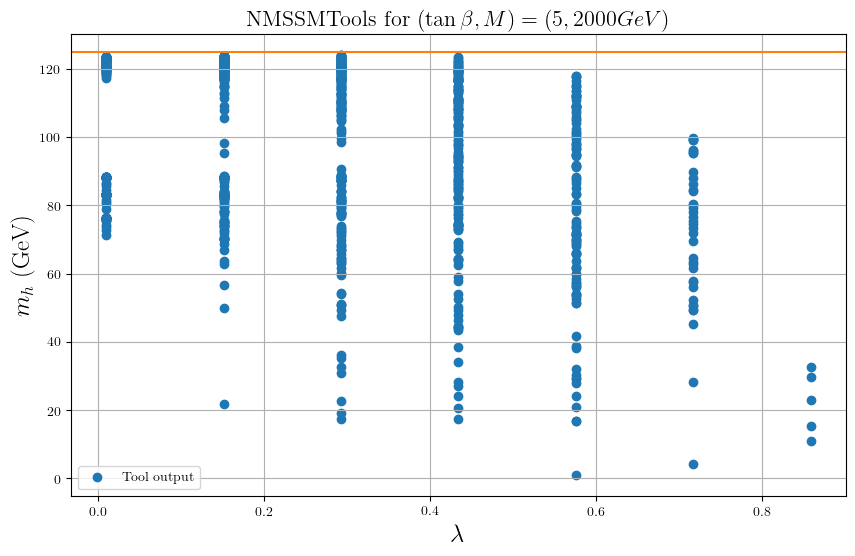

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(tb5_2K['lam'],tb5_2K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], tb5_1K['mhiggs'].apply(lambda x: x[0]).values, yerr=tb5_1K['errors'].apply(lambda x: x[0]).values, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (5,2000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim(110,140)
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

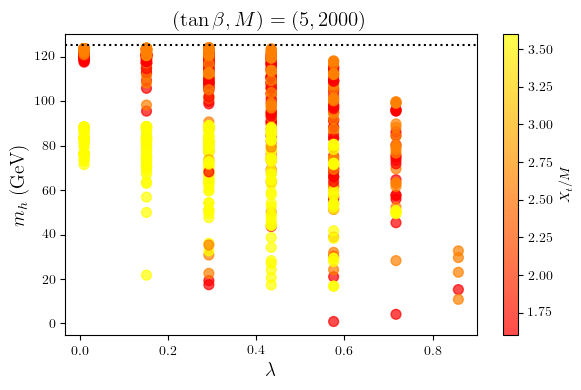

In [98]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb5_2K['lam'],  tb5_2K['mhiggs'].apply(lambda x: x[0]).values, c=tb5_2K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (5, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta = 20$

In [60]:
tb20_2K = df2K[
    (df2K['tanb'] == 20) &
    (df2K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb20_2K = tb20_2K.copy()
tb20_2K['Xt/M'] = tb20_2K['At/M'] - 2/20
tb20_2K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,20.0,1000.0,0.01,0.001,2.0,-1000.0,"[124.132418, 490.275331, 1584.71004]","[6679801.21, 300000.0, 300000.0]",1.9
1,20.0,1000.0,0.01,0.001,2.0,-747.5,"[125.116417, 584.05763, 1584.69378]","[6679965.82, 300000.0, 300000.0]",1.9


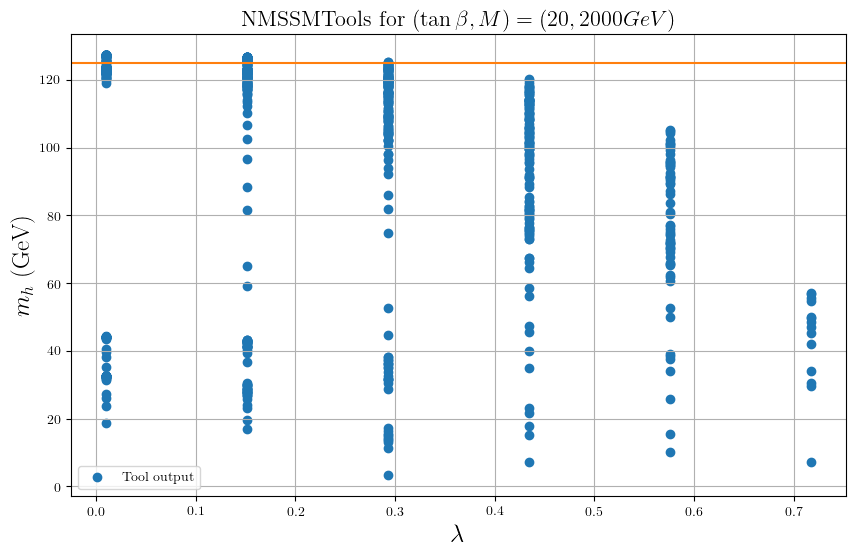

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(tb20_2K['lam'],tb20_2K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (20,2000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

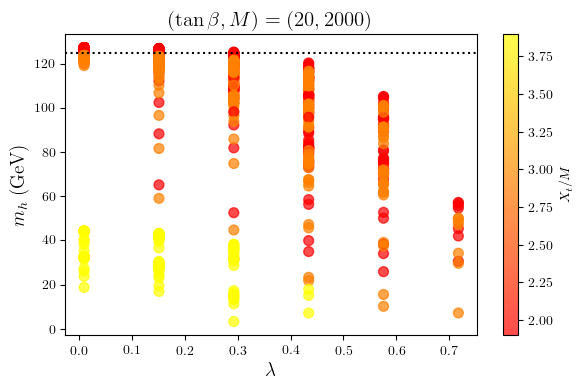

In [97]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb20_2K['lam'],  tb20_2K['mhiggs'].apply(lambda x: x[0]).values, c=tb20_2K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (20, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =50$

In [63]:
tb50_2K = df2K[
    (df2K['tanb'] == 50) &
    (df2K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb50_2K = tb50_2K.copy()
tb50_2K['Xt/M'] = tb50_2K['At/M'] - 2/50
tb50_2K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,50.0,1000.0,0.01,0.001,2.0,-1000.0,"[124.746301, 490.27863, 2162.74419]","[None, None, None]",1.96
1,50.0,1000.0,0.01,0.001,2.0,-747.5,"[125.731259, 584.059153, 2162.71539]","[None, None, None]",1.96


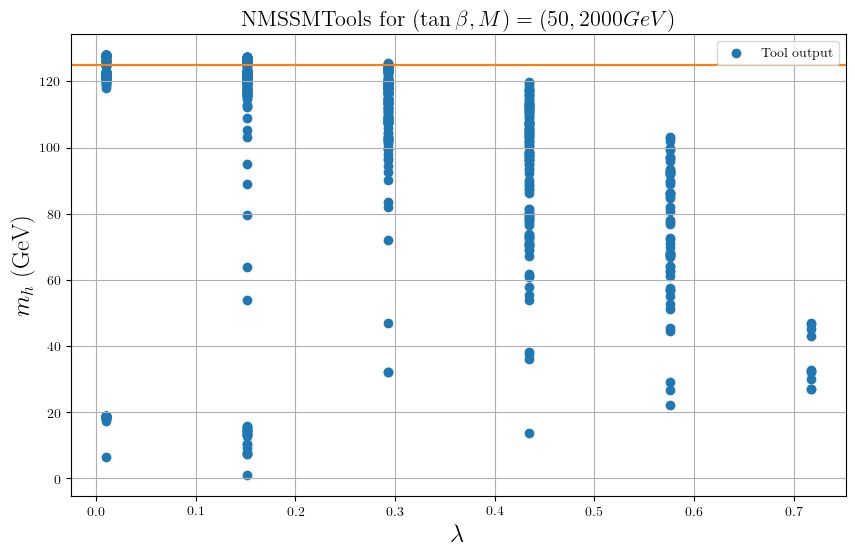

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(tb50_2K['lam'],tb50_2K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (50,2000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

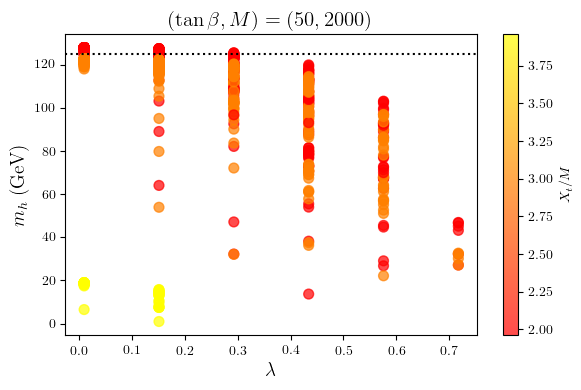

In [101]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb50_2K['lam'],  tb50_2K['mhiggs'].apply(lambda x: x[0]).values, c=tb50_2K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (50, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =20$, $M =2000$ and $\mu =0.7  M$

In [5]:
# Read the file and parse the 'mhiggs' and 'errors' columns
df2K0p7M = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_2000_0p7M.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    }
)

print(df2K0p7M.dtypes)


tanb        int64
mueff     float64
mA          int64
lam       float64
kappa     float64
At/M        int64
Ak        float64
M1          int64
M2          int64
M3          int64
mhiggs     object
errors     object
dtype: object


In [6]:
import ast

# Will use ast to convert the strings back to lists for the 'mhiggs' and 'errors' entries. 
df2K0p7M['mhiggs'] = df2K0p7M['mhiggs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df2K0p7M['mhiggs_1'] = df2K0p7M['mhiggs'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df2K0p7M['mhiggs_2'] = df2K0p7M['mhiggs'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 0 else None)
df2K0p7M['mhiggs_3'] = df2K0p7M['mhiggs'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 0 else None)


## For the error entries 
df2K0p7M['errors'] = df2K0p7M['errors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df2K0p7M['error_1'] = df2K0p7M['errors'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 0)  # Default to 0 if empty

df2K0p7M.head()


,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3,error_1
0,2,1400.0,0,0.01,0.001,2,-1000.0,2000,2500,3000,"[None, None, None]",[],NaN,NaN,NaN,0.0
1,2,1400.0,0,0.01,0.001,2,-747.5,2000,2500,3000,"[None, None, None]",[],NaN,NaN,NaN,0.0
2,2,1400.0,0,0.01,0.001,2,-495.0,2000,2500,3000,"[None, None, None]",[],NaN,NaN,NaN,0.0
3,2,1400.0,0,0.01,0.001,2,-242.5,2000,2500,3000,"[None, None, None]",[],NaN,NaN,NaN,0.0
4,2,1400.0,0,0.01,0.001,2,10.0,2000,2500,3000,"[None, None, None]",[],NaN,NaN,NaN,0.0


In [7]:
df2K0p7M_ordered = df2K0p7M[(df2K0p7M['mhiggs_1'] <= 200) & (df2K0p7M['mhiggs_1'] >= 100) & (df2K0p7M['mhiggs_1'] < df2K0p7M['mhiggs_2']) & (df2K0p7M['mhiggs_1'] < df2K0p7M['mhiggs_3'])]
df2K0p7M_ordered.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3,error_1
70,2,1400.0,0,0.01,0.215,2,-1000.0,2000,2500,3000,"[103.181071, 583.678776, 60032.2953]","[300000.0, 300000.0, 300000.0]",103.181071,583.678776,60032.2953,300000.0
71,2,1400.0,0,0.01,0.215,2,-747.5,2000,2500,3000,"[103.18501, 585.370348, 60094.1583]","[300000.0, 300000.0, 300000.0]",103.185010,585.370348,60094.1583,300000.0


In [8]:
df2K0p7M_ordered[df2K0p7M_ordered['mA'] == 800].head()

,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3,error_1
8963,2,1400.0,800,0.01,0.001,2,-242.5,2000,2500,3000,"[101.803462, 212.054443, 804.075161]","[1.37, 0.11, 338.55]",101.803462,212.054443,804.075161,1.37
8968,2,1400.0,800,0.01,0.001,3,-242.5,2000,2500,3000,"[106.010414, 212.076703, 802.266061]","[20.23, 44.71, 589.82]",106.010414,212.076703,802.266061,20.23
8995,2,1400.0,800,0.01,0.108,2,-1000.0,2000,2500,3000,"[104.484451, 824.172006, 29996.7637]","[0.93, 334.83, 3.12]",104.484451,824.172006,29996.763700,0.93
8996,2,1400.0,800,0.01,0.108,2,-747.5,2000,2500,3000,"[104.484536, 824.406992, 30060.2484]","[0.93, 334.86, 3.12]",104.484536,824.406992,30060.248400,0.93
8997,2,1400.0,800,0.01,0.108,2,-495.0,2000,2500,3000,"[104.484398, 824.616838, 30123.4705]","[0.93, 334.9, 3.13]",104.484398,824.616838,30123.470500,0.93


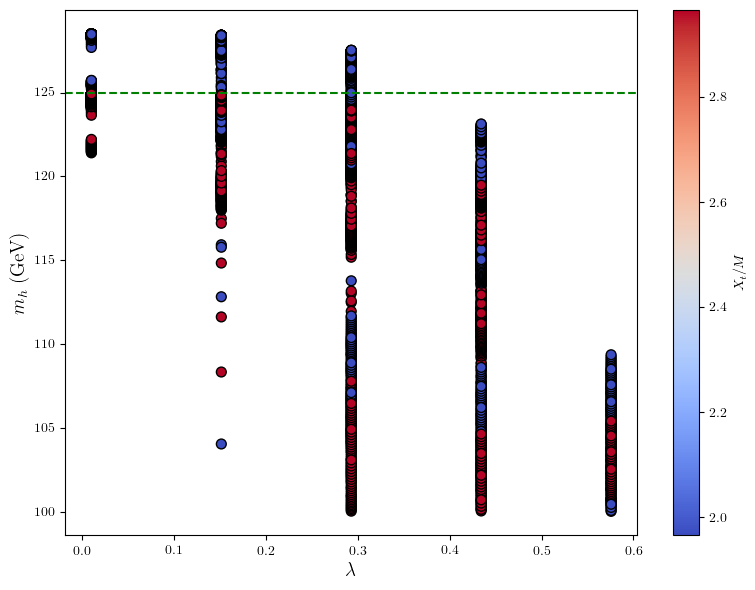

In [9]:
# heat map without interpolation

# ## All data --- No order requirement
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(df2K0p7M[df2K0p7M['tanb'] == 20]['lam'], df2K0p7M[df2K0p7M['tanb'] ==20]['mhiggs_1'], c=df2K0p7M[df2K0p7M['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
# plt.colorbar(scatter, label=r'$X_t/M$')

# plt.xlabel(r'$\lambda$', fontsize=14)
# plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
# #plt.ylim(95,175)
# # plt.xlim(0,1000)
# plt.axhline(y=125 , color='green', linestyle='--')
# plt.tight_layout()
# plt.show()

## Higgs spectrum order constraint 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df2K0p7M_ordered[df2K0p7M_ordered['tanb'] == 20]['lam'], df2K0p7M_ordered[df2K0p7M_ordered['tanb'] ==20]['mhiggs_1'],
                      c=df2K0p7M_ordered[df2K0p7M_ordered['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
#plt.ylim(95,175)
# plt.xlim(0,1000)
plt.axhline(y=125 , color='green', linestyle='--')
plt.tight_layout()
plt.show()

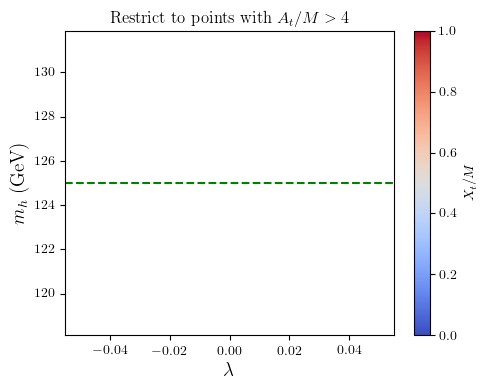

In [11]:
## Higgs spectrum order constraint 
plt.figure(figsize=(5, 4))
scatter = plt.scatter(df2K0p7M_ordered[(df2K0p7M_ordered['tanb'] == 20)&(df2K0p7M_ordered['At/M'] > 4)]['lam'], 
                      df2K0p7M_ordered[(df2K0p7M_ordered['tanb'] == 20)&(df2K0p7M_ordered['At/M'] > 4)]['mhiggs_1'], 
                      c=df2K0p7M_ordered[(df2K0p7M_ordered['tanb'] == 20)&(df2K0p7M_ordered['At/M'] > 4)]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'Restrict to points with $A_t/M > 4$')
#plt.ylim(95,175)
# plt.xlim(0,1000)
plt.axhline(y=125 , color='green', linestyle='--')
plt.tight_layout()
plt.show()

# Plot for $M =5000 GeV$

In [17]:
# Read the file and parse the 'mhiggs' and 'errors' columns
df5K = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_5000.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    },
    index_col = 0
)

print(df5K.dtypes)


tanb      float64
mueff     float64
mA        float64
lam       float64
kappa     float64
At/M      float64
Ak        float64
mhiggs     object
errors     object
dtype: object


In [46]:
np.unique(df5K['mhiggs'])

array([list([None, None, None])], dtype=object)

### $\tan \beta = 5$

In [68]:
tb5_5K = df5K[
    (df5K['tanb'] == 5) &
    (df5K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb5_5K = tb5_5K.copy()
tb5_5K['Xt/M'] = tb5_5K['At/M'] - 2/5
tb5_5K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,5.0,1000.0,0.01,0.001,2.0,-1000.0,"[122.45076, 1731.11428, 1751.24531]","[9552662.32, 300000.0, 300000.0]",1.6
1,5.0,1000.0,0.01,0.001,2.0,-747.5,"[122.564289, 1751.2261, 1802.57794]","[9552699.58, 300000.0, 300000.0]",1.6


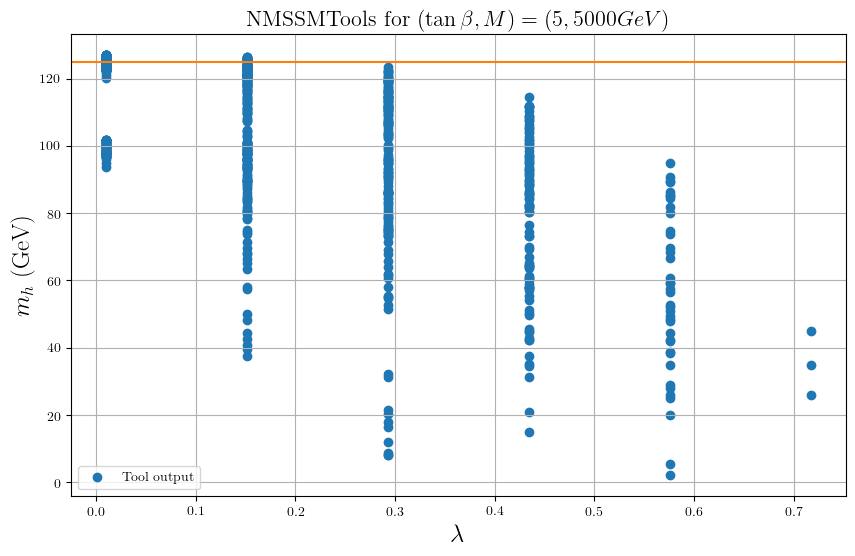

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(tb5_5K['lam'],tb5_5K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], tb5_1K['mhiggs'].apply(lambda x: x[0]).values, yerr=tb5_1K['errors'].apply(lambda x: x[0]).values, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (5,5000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim(110,140)
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

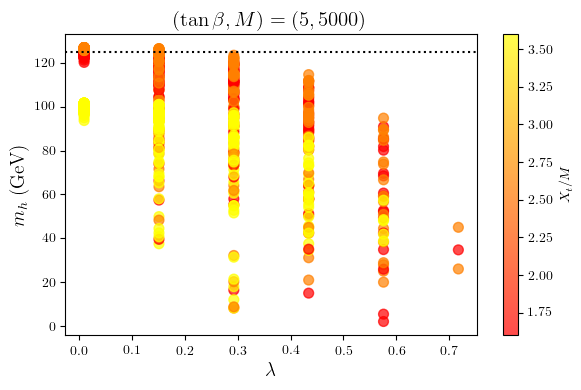

In [102]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb5_5K['lam'],  tb5_5K['mhiggs'].apply(lambda x: x[0]).values, c=tb5_5K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (5, 5000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =20$

In [74]:
tb20_5K = df5K[
    (df5K['tanb'] == 20) &
    (df5K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb20_5K = tb20_5K.copy()
tb20_5K['Xt/M'] = tb20_5K['At/M'] - 2/20
tb20_5K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,20.0,1000.0,0.01,0.001,2.0,-1000.0,"[128.718416, 1731.12119, 2997.24065]","[None, None, None]",1.9
1,20.0,1000.0,0.01,0.001,2.0,-747.5,"[128.829389, 1802.56808, 2997.23745]","[None, None, None]",1.9


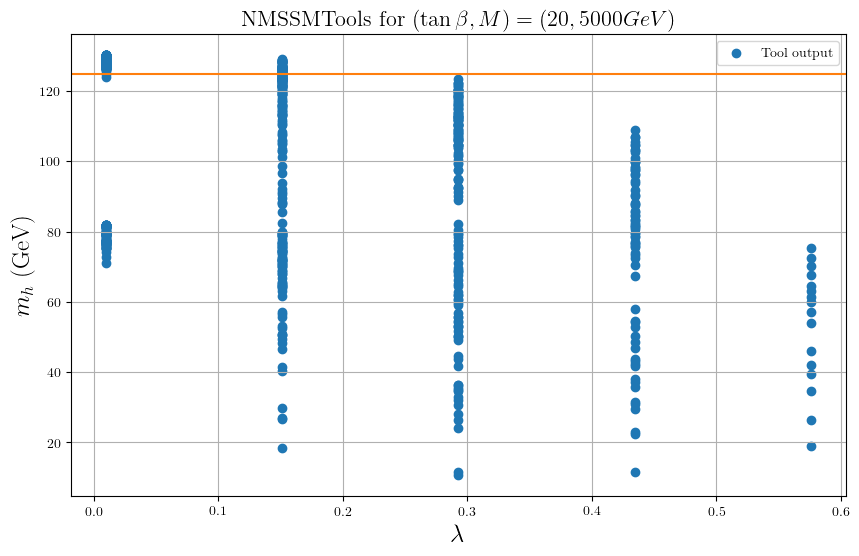

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(tb20_5K['lam'],tb20_5K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (20,5000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

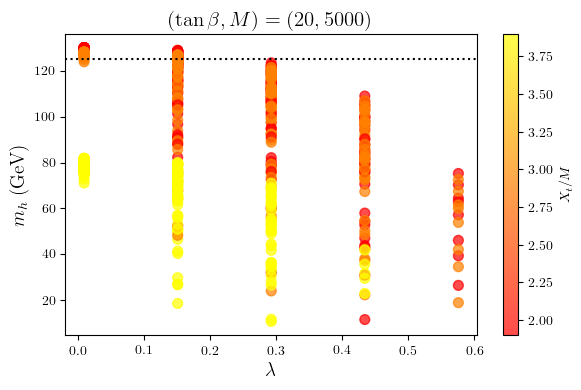

In [103]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb20_5K['lam'],  tb20_5K['mhiggs'].apply(lambda x: x[0]).values, c=tb20_5K['Xt/M'], cmap='autumn',s=50, alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (20, 5000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =20$, $M =5000$ and $\mu =0.7  M$

In [18]:
# Read the file and parse the 'mhiggs' and 'errors' columns
df5K0p7M = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_5000_0p7M.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    }
)

print(df5K0p7M.dtypes)


tanb        int64
mueff     float64
mA          int64
lam       float64
kappa     float64
At/M        int64
Ak        float64
M1          int64
M2          int64
M3          int64
mhiggs     object
errors     object
dtype: object


In [19]:
import ast

# Will use ast to convert the strings back to lists for the 'mhiggs' and 'errors' entries. 
df5K0p7M['mhiggs'] = df5K0p7M['mhiggs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df5K0p7M['mhiggs_1'] = df5K0p7M['mhiggs'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df5K0p7M['mhiggs_2'] = df5K0p7M['mhiggs'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 0 else None)
df5K0p7M['mhiggs_3'] = df5K0p7M['mhiggs'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 0 else None)


## For the error entries 
df5K0p7M['errors'] = df5K0p7M['errors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df5K0p7M['error_1'] = df5K0p7M['errors'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 0)  # Default to 0 if empty

df5K0p7M.head()


,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3,error_1
0,5,3500.0,0,0.01,0.001,2,-1000.0,5000,5500,6000,"[None, None, None]",[],NaN,NaN,NaN,0.0
1,5,3500.0,0,0.01,0.001,2,-747.5,5000,5500,6000,"[None, None, None]",[],NaN,NaN,NaN,0.0
2,5,3500.0,0,0.01,0.001,2,-495.0,5000,5500,6000,"[None, None, None]",[],NaN,NaN,NaN,0.0
3,5,3500.0,0,0.01,0.001,2,-242.5,5000,5500,6000,"[None, None, None]",[],NaN,NaN,NaN,0.0
4,5,3500.0,0,0.01,0.001,2,10.0,5000,5500,6000,"[None, None, None]",[],NaN,NaN,NaN,0.0


In [20]:
df5K0p7M_ordered = df5K0p7M[(df5K0p7M['mhiggs_1'] <= 200) & (df5K0p7M['mhiggs_1'] >= 100) & (df5K0p7M['mhiggs_1'] < df5K0p7M['mhiggs_2']) & (df5K0p7M['mhiggs_1'] < df5K0p7M['mhiggs_3'])]
df5K0p7M_ordered.head(2)

,tanb,mueff,mA,lam,kappa,At/M,Ak,M1,M2,M3,mhiggs,errors,mhiggs_1,mhiggs_2,mhiggs_3,error_1
5,5,3500.0,0,0.01,0.108,2,-1000.0,5000,5500,6000,"[125.744841, 555.164402, 75367.8343]","[4103845.83, 300000.0, 300000.0]",125.744841,555.164402,75367.8343,4103845.83
6,5,3500.0,0,0.01,0.108,2,-747.5,5000,5500,6000,"[125.732184, 556.556538, 75430.5721]","[4103287.43, 300000.0, 300000.0]",125.732184,556.556538,75430.5721,4103287.43


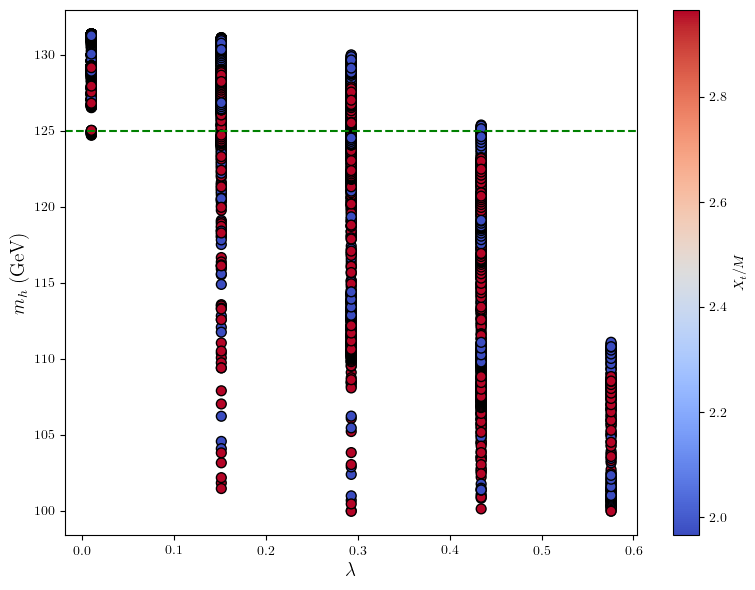

In [21]:
# heat map without interpolation

# ## All data --- No order requirement
# plt.figure(figsize=(6, 4))
# scatter = plt.scatter(df5K0p7M[df5K0p7M['tanb'] == 20]['lam'], df5K0p7M[df5K0p7M['tanb'] ==20]['mhiggs_1'], c=df5K0p7M[df5K0p7M['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
# plt.colorbar(scatter, label=r'$X_t/M$')

# plt.xlabel(r'$\lambda$', fontsize=14)
# plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
# # plt.ylim(-60e+3,60e+3)
# # plt.xlim(0,1000)
# plt.axhline(y=125 , color='green', linestyle='--')
# plt.tight_layout()
# plt.show()

## Higgs spectrum order constraint 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df5K0p7M_ordered[df5K0p7M_ordered['tanb'] == 20]['lam'], df5K0p7M_ordered[df5K0p7M_ordered['tanb'] ==20]['mhiggs_1'], c=df5K0p7M_ordered[df5K0p7M_ordered['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t/M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
#plt.ylim(95,175)
# plt.xlim(0,1000)
plt.axhline(y=125 , color='green', linestyle='--')
plt.tight_layout()
plt.show()

#### Combined plots for the overleaf

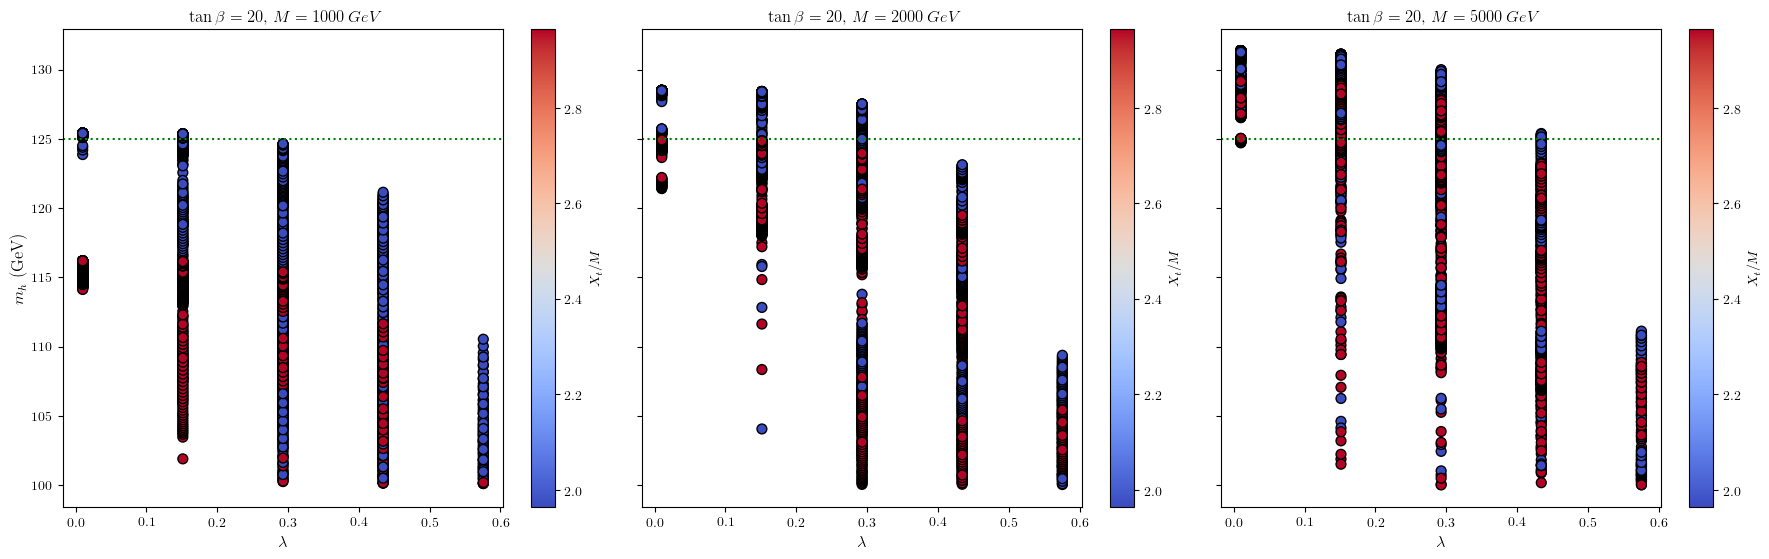

In [22]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Panel 1
scatter1 = axes[0].scatter(df1K0p7M_ordered[df1K0p7M_ordered['tanb'] == 20]['lam'], df1K0p7M_ordered[df1K0p7M_ordered['tanb'] ==20]['mhiggs_1'], c=df1K0p7M_ordered[df1K0p7M_ordered['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
axes[0].set_title(r'$\tan \beta =20$, $ M = 1000 \, GeV$')
axes[0].set_xlabel(r'$\lambda$', fontsize=12)
axes[0].set_ylabel(r'$m_h$ (GeV)', fontsize=12)
axes[0].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter1, ax=axes[0], label=r'$X_t/M$')


# Panel 2
scatter2 = axes[1].scatter(df2K0p7M_ordered[df2K0p7M_ordered['tanb'] == 20]['lam'], df2K0p7M_ordered[df2K0p7M_ordered['tanb'] ==20]['mhiggs_1'], c=df2K0p7M_ordered[df2K0p7M_ordered['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
axes[1].set_title(r'$\tan \beta =20$, $ M = 2000 \, GeV$')
axes[1].set_xlabel(r'$\lambda$', fontsize=12)
axes[1].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter2, ax=axes[1], label=r'$X_t/M$')

# Panel 3
scatter3 = axes[2].scatter(df5K0p7M_ordered[df5K0p7M_ordered['tanb'] == 20]['lam'], df5K0p7M_ordered[df5K0p7M_ordered['tanb'] ==20]['mhiggs_1'], c=df5K0p7M_ordered[df5K0p7M_ordered['tanb'] == 20]['At/M']-0.7/20, cmap='coolwarm',s=50,  edgecolor='k')
axes[2].set_title(r'$\tan \beta =20$, $ M = 5000 \, GeV$')
axes[2].set_xlabel(r'$\lambda$', fontsize=12)
axes[2].axhline(y=125, color='green', linestyle=':')
fig.colorbar(scatter3, ax=axes[2], label=r'$X_t/M$')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/plots/sampling_with_tool_mu0p7M_tanb20.pdf", format="pdf", bbox_inches="tight")
plt.show()


### $\tan \beta =50$

In [77]:
tb50_5K = df5K[
    (df5K['tanb'] == 50) &
    (df5K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb50_5K = tb50_5K.copy()
tb50_5K['Xt/M'] = tb50_5K['At/M'] - 2/50
tb50_5K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,50.0,1000.0,0.01,0.001,2.0,-1000.0,"[129.337318, 1731.11953, 4600.59913]","[None, None, None]",1.96
1,50.0,1000.0,0.01,0.001,2.0,-747.5,"[129.44828, 1802.56646, 4600.59434]","[None, None, None]",1.96


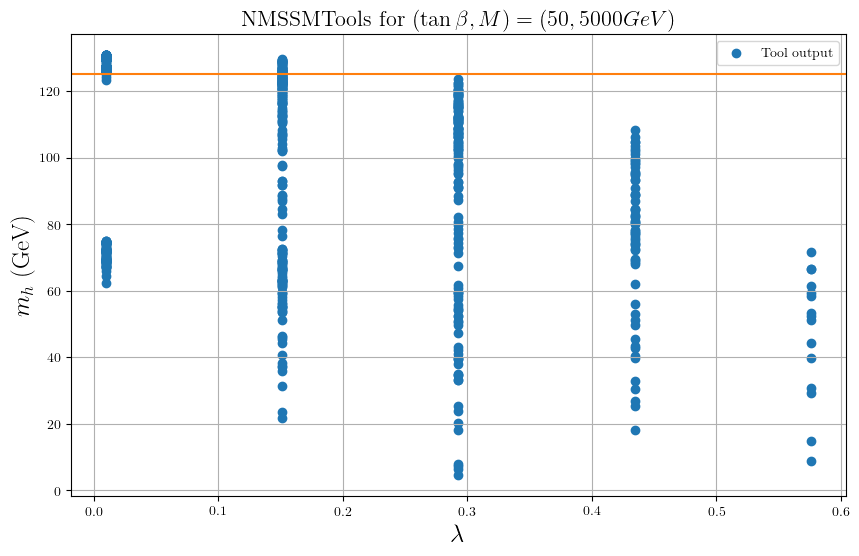

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(tb50_5K['lam'],tb50_5K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (50,5000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

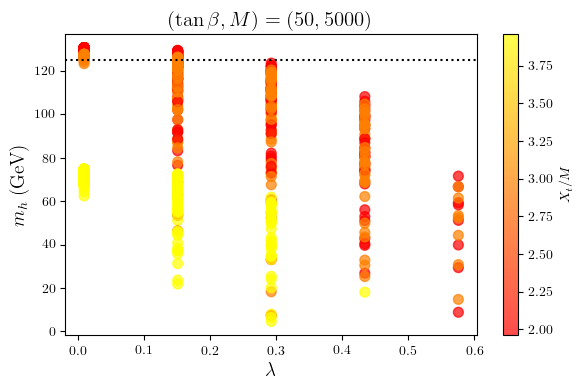

In [104]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb50_5K['lam'],  tb50_5K['mhiggs'].apply(lambda x: x[0]).values, c=tb50_5K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (50, 5000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()